In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    log_loss,
    roc_curve,
    precision_recall_curve
)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import pickle
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/music-popularity/MusicDataset.csv")

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_name,duration,end_of_fade_in,key,...,mode_confidence,release,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,NaN,"Atlanta, GA",NaN,Mastodon,280.21506,0.238,5,...,0.500,Call of the Mastodon,0.597641,275.528,173.205,5,0.120,Deep Sea Creature,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,NaN,California - LA,NaN,Casual,218.93179,0.247,1,...,0.636,Fear Itself,0.602120,218.932,92.198,4,0.778,I Didn't Mean To,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,"Memphis, TN",-90.04892,The Box Tops,148.03546,0.148,6,...,0.430,Dimensions,NaN,137.915,121.274,4,0.384,Soul Deep,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,NaN,NaN,NaN,Sonora Santanera,177.47546,0.282,8,...,0.565,Las Numero 1 De La Sonora Santanera,NaN,172.304,100.070,1,0.000,Amor De Cabaret,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,NaN,"London, England",NaN,Adam Ant,233.40363,0.000,0,...,0.749,Friend Or Foe,NaN,217.124,119.293,4,0.000,Something Girls,1982,0


In [4]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title',"artist_id"]
df.drop(columns=drop_list,axis=1,inplace=True)

In [5]:
df.shape

(10001, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   artist_familiarity         9997 non-null   float64
 1   artist_hotttnesss          10001 non-null  float64
 2   duration                   10001 non-null  float64
 3   end_of_fade_in             10001 non-null  float64
 4   key                        10001 non-null  int64  
 5   key_confidence             10001 non-null  float64
 6   loudness                   10001 non-null  float64
 7   mode                       10001 non-null  int64  
 8   mode_confidence            10001 non-null  float64
 9   song_hotttnesss            5649 non-null   float64
 10  start_of_fade_out          10001 non-null  float64
 11  tempo                      10001 non-null  float64
 12  time_signature             10001 non-null  int64  
 13  time_signature_confidence  10001 non-null  flo

In [7]:
mean=df["song_hotttnesss"].mean()
df["song_hotttnesss"]=df["song_hotttnesss"].fillna(mean)
mean=df["artist_familiarity"].mean()
df["artist_familiarity"] = df["artist_familiarity"].fillna(mean)

In [8]:
df.isnull().sum()

artist_familiarity           0
artist_hotttnesss            0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
song_hotttnesss              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
year                         0
bbhot                        0
dtype: int64

In [9]:
df.head()

,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,bbhot
0,0.780462,0.574275,280.21506,0.238,5,0.555,-3.306,1,0.500,0.597641,275.528,173.205,5,0.120,2001,0
1,0.581794,0.401998,218.93179,0.247,1,0.736,-11.197,0,0.636,0.602120,218.932,92.198,4,0.778,0,0
2,0.630630,0.417500,148.03546,0.148,6,0.169,-9.843,0,0.430,0.342867,137.915,121.274,4,0.384,1969,1
3,0.487357,0.343428,177.47546,0.282,8,0.643,-9.689,1,0.565,0.342867,172.304,100.070,1,0.000,0,0
4,0.630382,0.454231,233.40363,0.000,0,0.751,-9.013,1,0.749,0.342867,217.124,119.293,4,0.000,1982,0


In [10]:
numerical_cols = [
    'artist_familiarity', 'artist_hotttnesss', 'duration', 'end_of_fade_in',
    'key_confidence', 'loudness', 'mode_confidence', 'song_hotttnesss',
    'start_of_fade_out', 'tempo', 'time_signature_confidence'
]
categorical_cols = ['key', 'mode', 'time_signature', 'bbhot']
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)
df_valid_year = df[df['year'] != 0]

# Box Plots for numerical columns by 'mode' and 'bbhot'

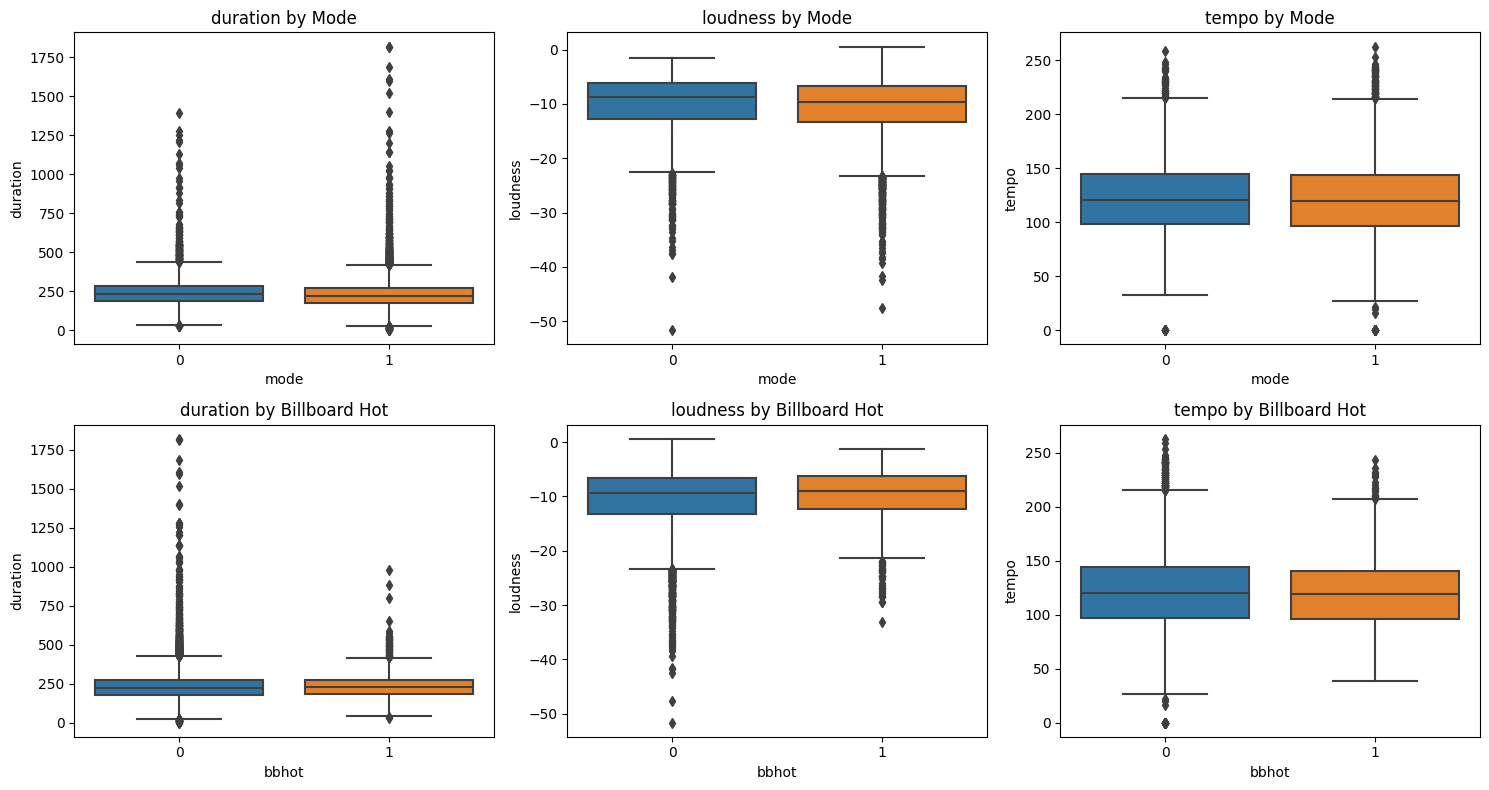

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
plot_cols = ['duration', 'loudness', 'tempo']  # Limit to 3 for brevity
for i, col in enumerate(plot_cols):
    # Box plot by 'mode'
    sns.boxplot(x='mode', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Mode')
    # Box plot by 'bbhot'
    sns.boxplot(x='bbhot', y=col, data=df, ax=axes[i + 3])
    axes[i + 3].set_title(f'{col} by Billboard Hot')
plt.tight_layout()
plt.show()


# Scatter Plots for selected numerical pairs

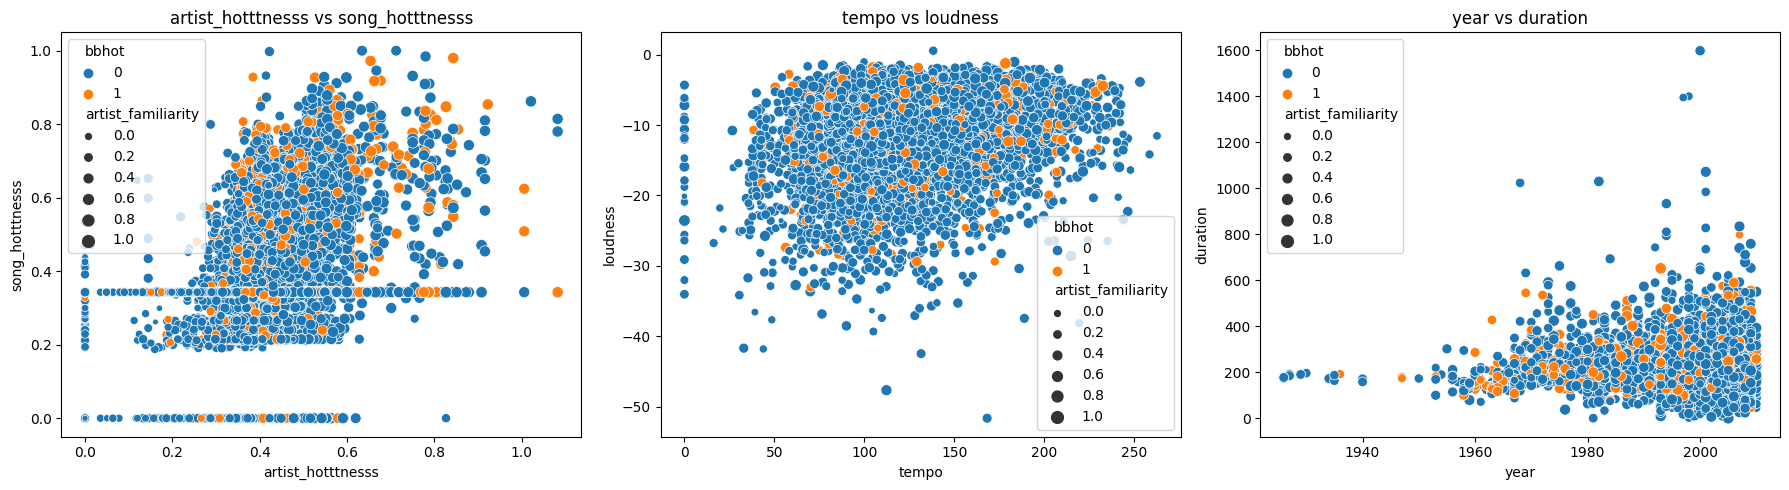

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
scatter_pairs = [
    ('artist_hotttnesss', 'song_hotttnesss'),
    ('tempo', 'loudness'),
    ('year', 'duration')
]
for i, (x_col, y_col) in enumerate(scatter_pairs):
    data_to_plot = df_valid_year if x_col == 'year' or y_col == 'year' else df
    if not data_to_plot.empty:
        sns.scatterplot(x=x_col, y=y_col, hue='bbhot', size='artist_familiarity', data=data_to_plot, ax=axes[i])
        axes[i].set_title(f'{x_col} vs {y_col}')
plt.tight_layout()
plt.show()


# Pair Plot (separate figure due to complexity)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


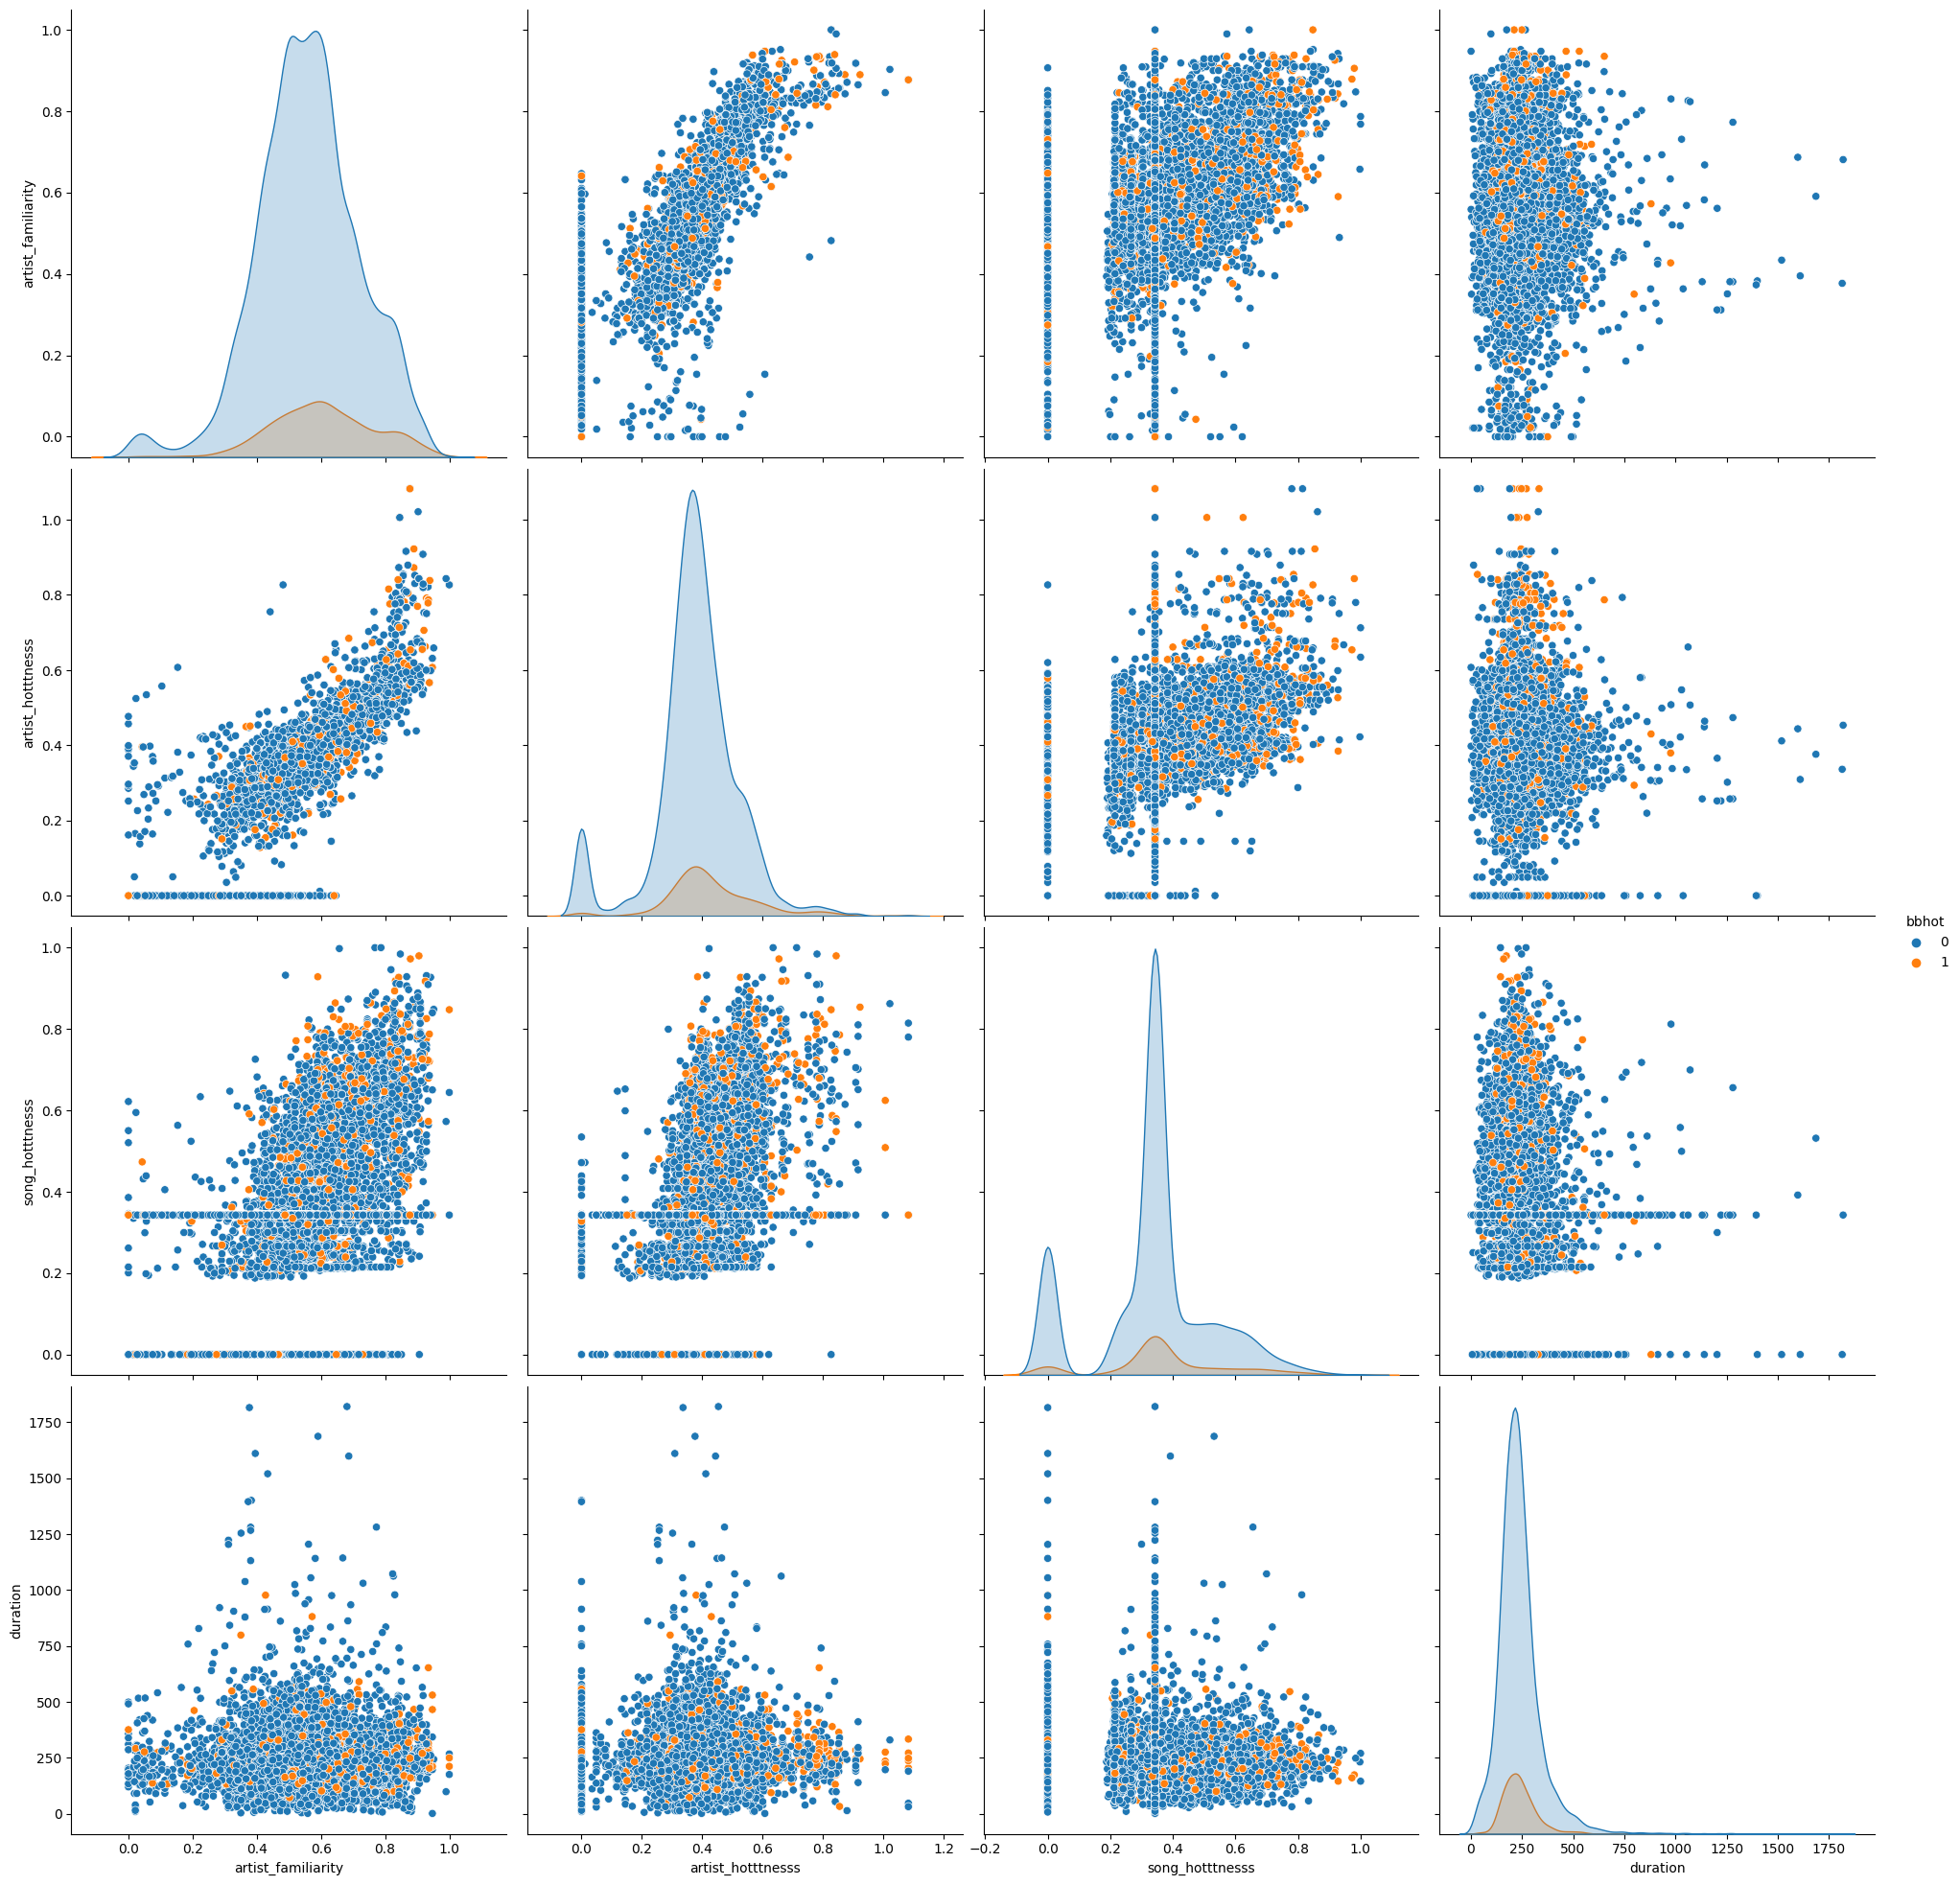

In [13]:
subset_cols = ['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'duration']
sns.pairplot(df[subset_cols + ['bbhot']], hue='bbhot', diag_kind='kde',height=5)
plt.show()


# Bar Plots for categorical variables


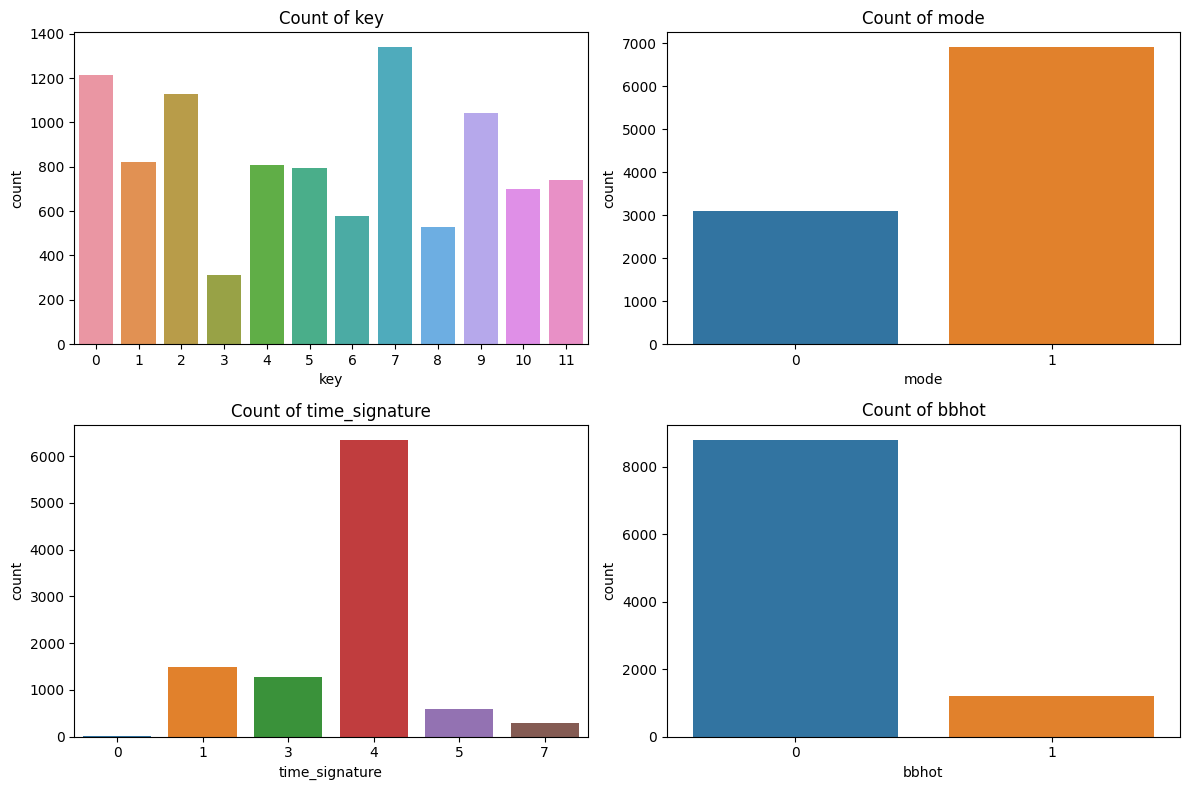

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap

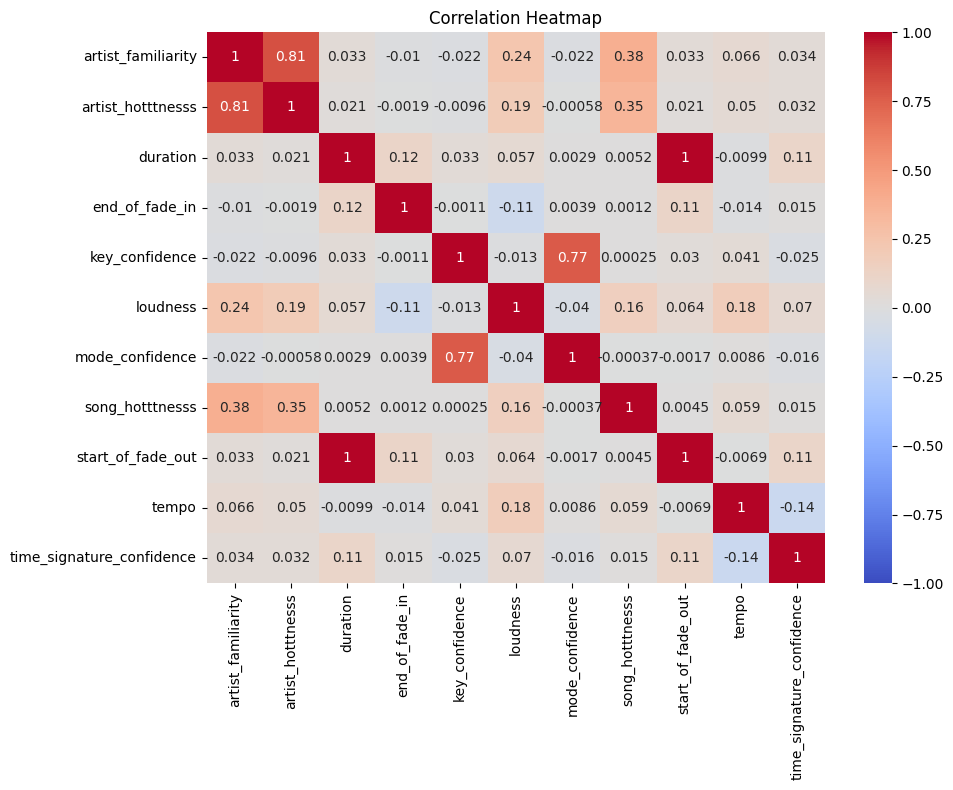

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Violin Plots for numerical columns by categorical variables

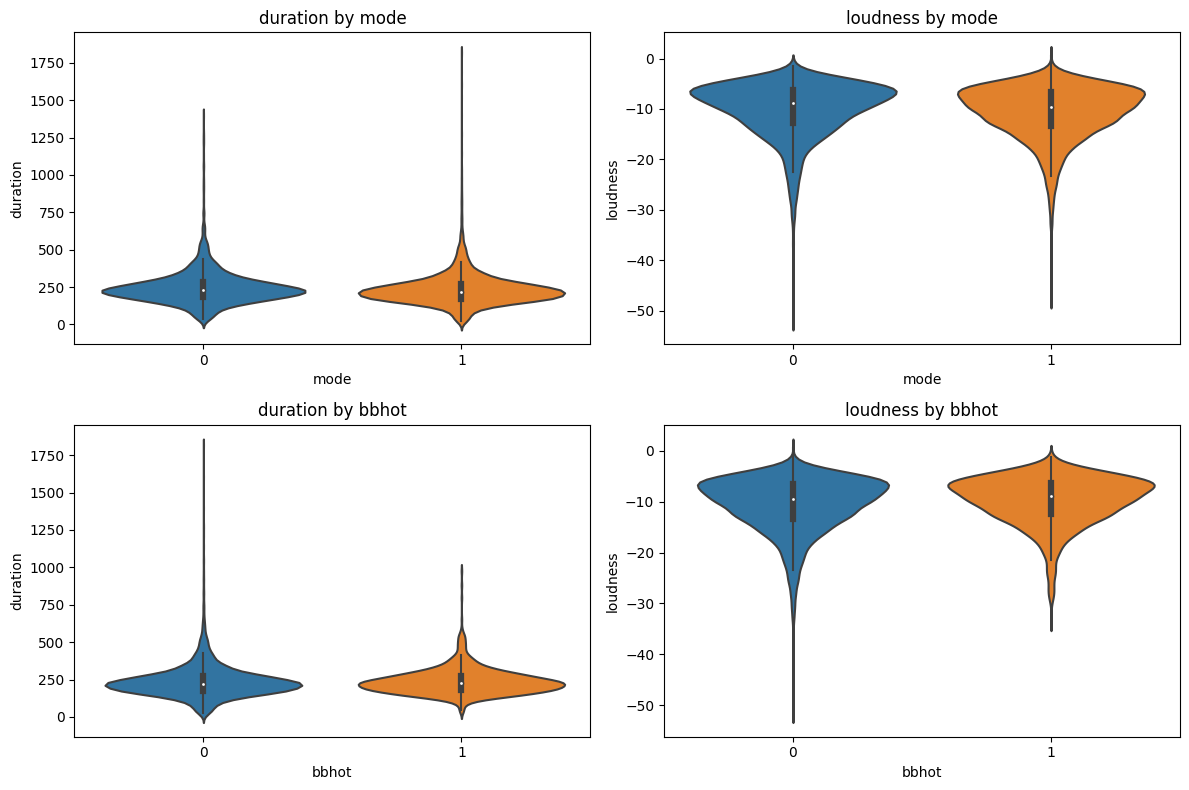

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
plot_configs = [
    ('duration', 'mode'), ('loudness', 'mode'),
    ('duration', 'bbhot'), ('loudness', 'bbhot')
]
for i, ( y_col, x_col) in enumerate(plot_configs):
    sns.violinplot(x=x_col, y=y_col, data=df, ax=axes[i])
    axes[i].set_title(f'{y_col} by {x_col}')
plt.tight_layout()
plt.show()

#  Trend Plot for duration over years

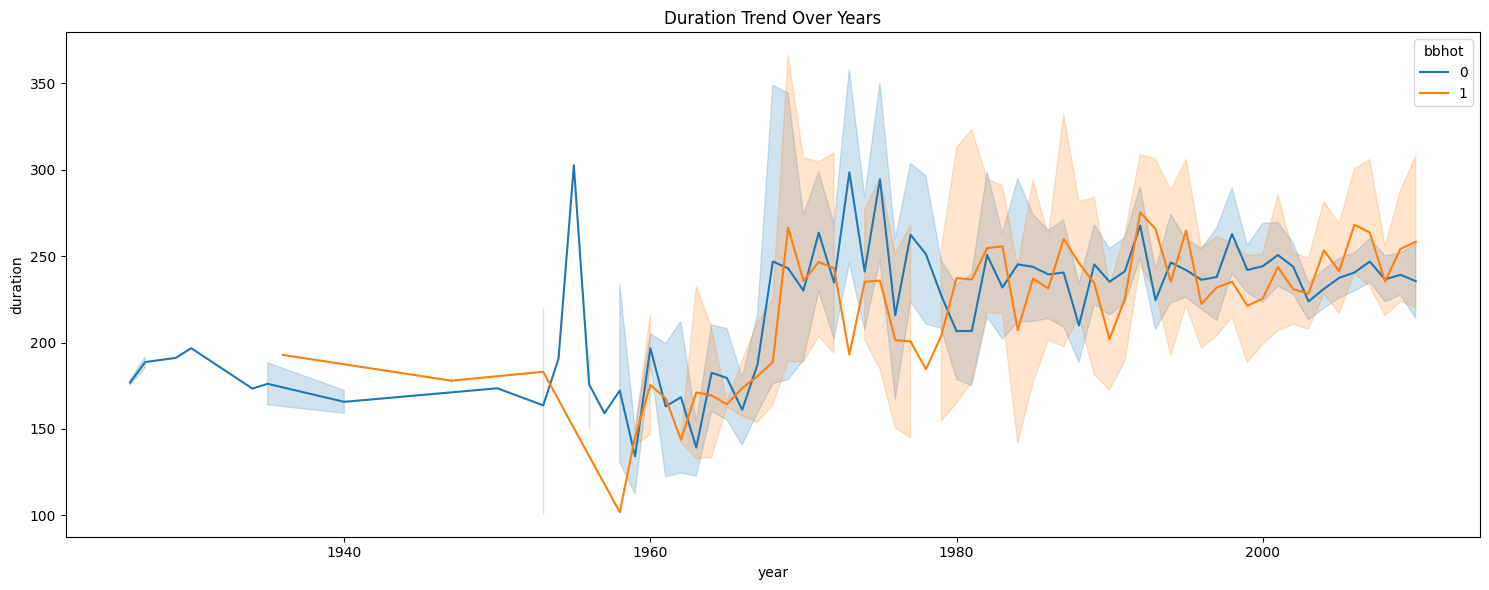

In [17]:
df_valid_year = df[df['year'] != 0]
if not df_valid_year.empty:
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(x='year', y='duration', hue='bbhot', data=df_valid_year, ax=ax)
    ax.set_title('Duration Trend Over Years')
    plt.tight_layout()
    plt.show()

# Histplot

/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_35/825483116.

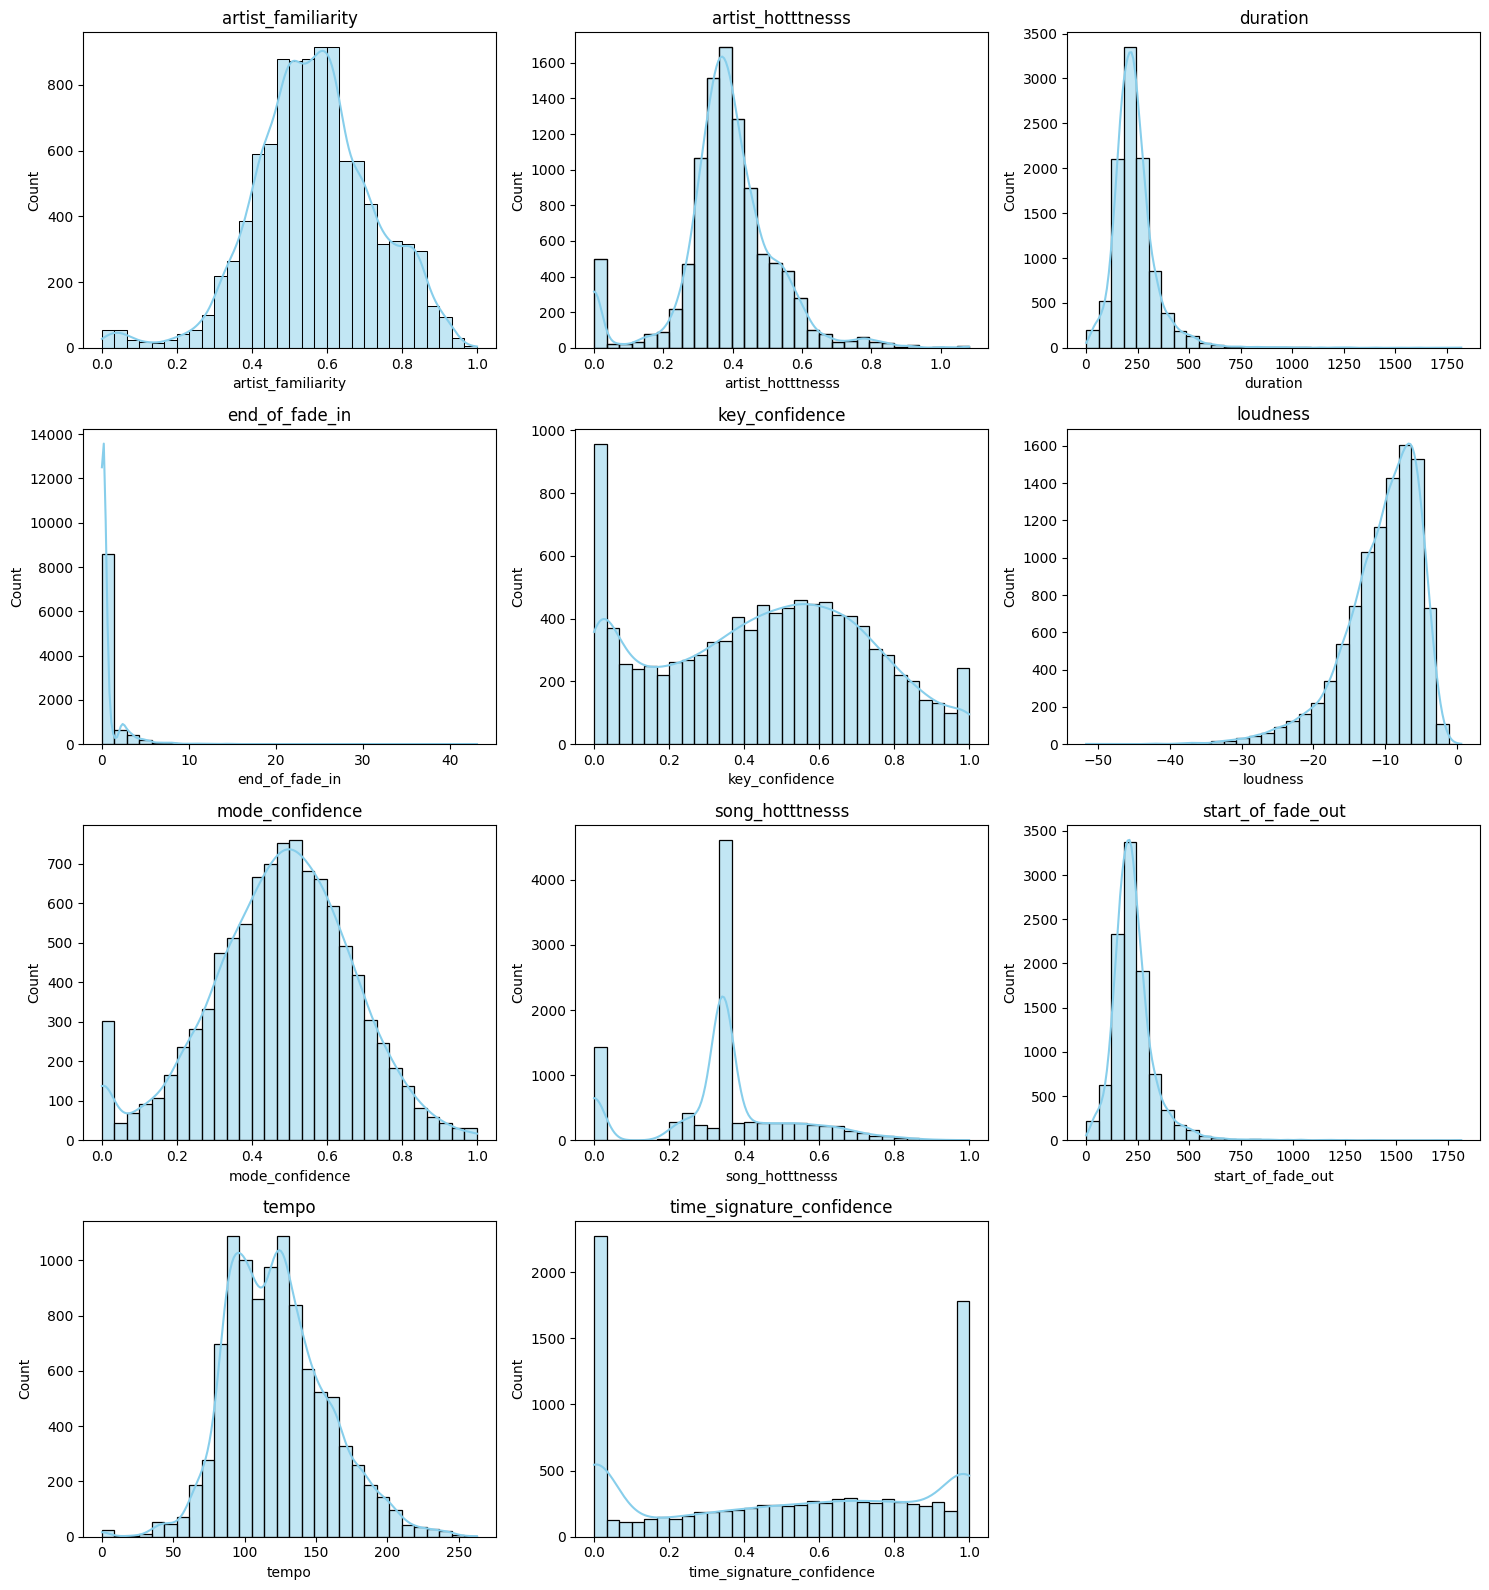

In [18]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Set the figure size
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through and plot each histogram
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [19]:
df.head()

,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,bbhot
0,0.780462,0.574275,280.21506,0.238,5,0.555,-3.306,1,0.500,0.597641,275.528,173.205,5,0.120,2001,0
1,0.581794,0.401998,218.93179,0.247,1,0.736,-11.197,0,0.636,0.602120,218.932,92.198,4,0.778,0,0
2,0.630630,0.417500,148.03546,0.148,6,0.169,-9.843,0,0.430,0.342867,137.915,121.274,4,0.384,1969,1
3,0.487357,0.343428,177.47546,0.282,8,0.643,-9.689,1,0.565,0.342867,172.304,100.070,1,0.000,0,0
4,0.630382,0.454231,233.40363,0.000,0,0.751,-9.013,1,0.749,0.342867,217.124,119.293,4,0.000,1982,0


In [20]:
X=df.drop(columns=["bbhot"],axis=1)
y=df["bbhot"]

# 1. Correlation Analysis (for numerical features)

In [21]:
corr = df[numerical_cols + ['bbhot']].corr()['bbhot'].abs().sort_values(ascending=False)
print("Correlation with bbhot:\n", corr)

Correlation with bbhot:
 bbhot                        1.000000
artist_hotttnesss            0.118804
artist_familiarity           0.098623
song_hotttnesss              0.063800
loudness                     0.046871
time_signature_confidence    0.018264
key_confidence               0.017833
mode_confidence              0.017496
end_of_fade_in               0.013317
tempo                        0.010014
start_of_fade_out            0.000745
duration                     0.000715
Name: bbhot, dtype: float64


# 2. Feature Importance from Random Forest

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", importance)



Random Forest Feature Importance:
 artist_hotttnesss            0.096929
artist_familiarity           0.088884
tempo                        0.086647
loudness                     0.086606
start_of_fade_out            0.083005
duration                     0.081981
mode_confidence              0.080371
key_confidence               0.078964
end_of_fade_in               0.065572
time_signature_confidence    0.059707
song_hotttnesss              0.059256
year                         0.052901
key                          0.046529
time_signature               0.022031
mode                         0.010620
dtype: float64


# 3. Mutual Information (for completeness, though less reliable with small data)

In [23]:
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("\nMutual Information Scores:\n", mi_scores)


Mutual Information Scores:
 artist_familiarity           0.041229
artist_hotttnesss            0.036052
song_hotttnesss              0.010035
year                         0.006249
start_of_fade_out            0.003322
mode_confidence              0.003091
tempo                        0.002453
mode                         0.001617
key_confidence               0.001192
time_signature               0.000020
duration                     0.000000
loudness                     0.000000
key                          0.000000
end_of_fade_in               0.000000
time_signature_confidence    0.000000
dtype: float64


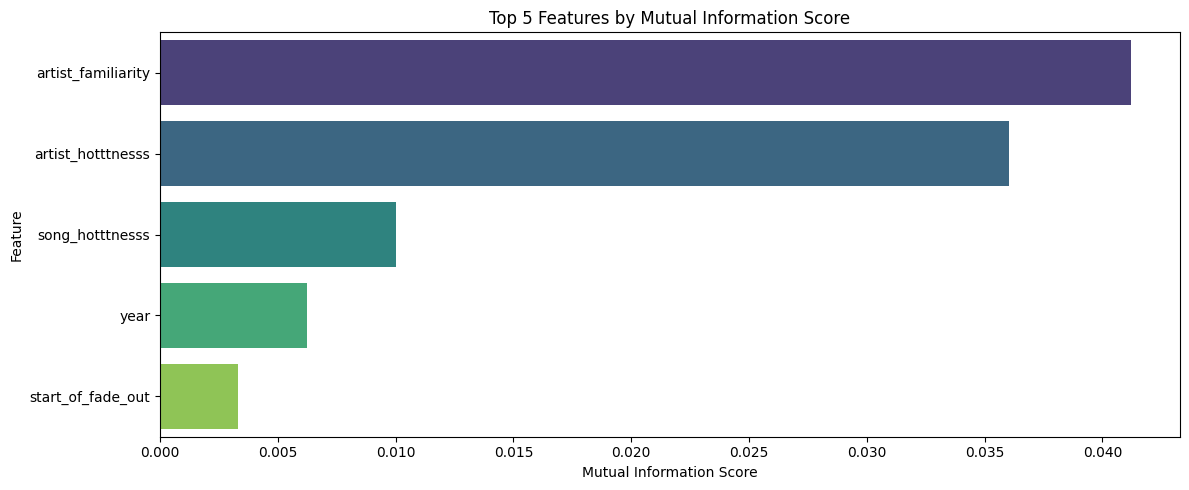

In [24]:
top5_mi = mi_scores.head(5)
plt.figure(figsize=(12,5))
sns.barplot(x=top5_mi.values, y=top5_mi.index, palette='viridis')
plt.title("Top 5 Features by Mutual Information Score")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [25]:
top_features=mi_scores.head(5).index.tolist()
top=X[top_features].copy()
df=top.copy()
df["label"]=y
df.head()

,artist_familiarity,artist_hotttnesss,song_hotttnesss,year,start_of_fade_out,label
0,0.780462,0.574275,0.597641,2001,275.528,0
1,0.581794,0.401998,0.602120,0,218.932,0
2,0.630630,0.417500,0.342867,1969,137.915,1
3,0.487357,0.343428,0.342867,0,172.304,0
4,0.630382,0.454231,0.342867,1982,217.124,0


In [26]:
X=df.drop(columns=["label"],axis=1)
y=df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (8000, 5), Test shape: (2001, 5)


In [27]:
model = CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=6,verbose=100,random_seed=42,task_type='GPU')

model.fit(X_train,y_train)

0:	learn: 0.6174845	total: 13.3s	remaining: 3h 41m 1s
100:	learn: 0.3270771	total: 16.3s	remaining: 2m 24s
200:	learn: 0.3177585	total: 18.7s	remaining: 1m 14s
300:	learn: 0.3135789	total: 20.9s	remaining: 48.6s
400:	learn: 0.3098032	total: 23s	remaining: 34.4s
500:	learn: 0.3063303	total: 25.2s	remaining: 25.1s
600:	learn: 0.3026949	total: 27.5s	remaining: 18.2s
700:	learn: 0.2997130	total: 29.8s	remaining: 12.7s
800:	learn: 0.2974290	total: 32s	remaining: 7.94s
900:	learn: 0.2951403	total: 34.3s	remaining: 3.77s
999:	learn: 0.2928219	total: 36.6s	remaining: 0us


In [28]:
y_pred=model.predict(X_test)

if len(set(y_test)) == 2:
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
else:
    roc_auc = "ROC-AUC is only for binary classification"

# Print metrics
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"ROC AUC:   {roc_auc}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.8806
Precision: 0.8356
Recall:    0.8806
F1 Score:  0.8332
ROC AUC:   0.622323007478658

Confusion Matrix:
[[1753   10]
 [ 229    9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1763
           1       0.47      0.04      0.07       238

    accuracy                           0.88      2001
   macro avg       0.68      0.52      0.50      2001
weighted avg       0.84      0.88      0.83      2001



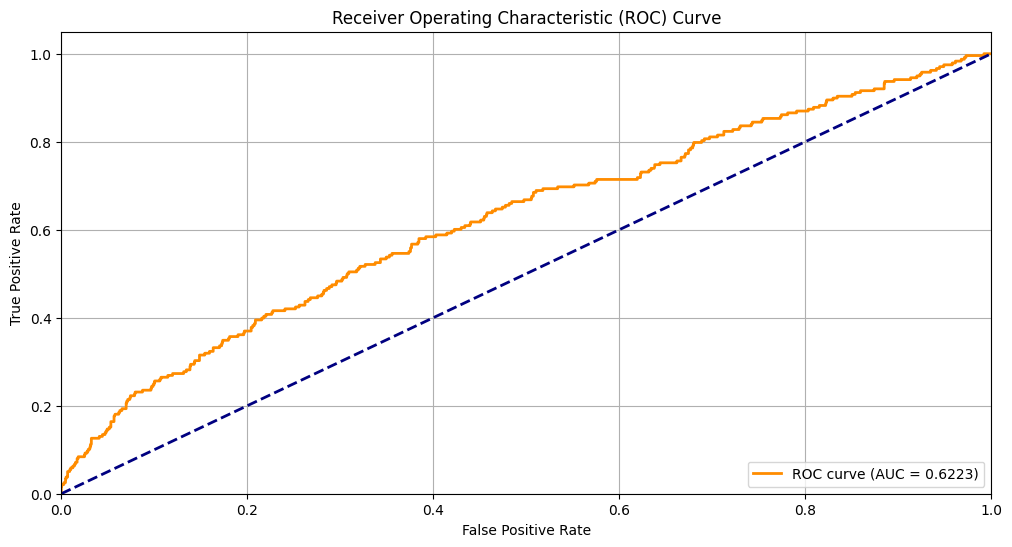

In [29]:
from sklearn.metrics import roc_curve, auc
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [30]:
file=open("cat_model.pkl","wb")
pickle.dump(model,file)
file.close()

In [31]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper